In [1]:
import numpy as np
import pandas as pd
import io
import seaborn as sns  # data visualization library based on matplotlib
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler

**PCA (Principal Components Analysis) gives us our ideal set of features. It creates a set of principal components that are rank ordered by variance (the first component has higher variance than the second, the second has higher variance than the third, and so on), uncorrelated, and low in number (we can throw away the lower ranked components as they contain little signal)**

In [4]:
# Load the dataset
start_time=time.time() 
data = pd.read_csv("/content/drive/MyDrive/deep_learning_bootcamp/day4/iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


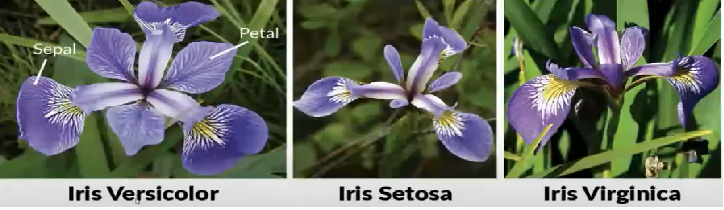

In [5]:
# Load the dataset/alternate method
'''from google.colab import files

# To store dataset in a Pandas Dataframe
data = pd.read_csv(io.BytesIO(files.upload()['iris.csv']))'''

"from google.colab import files\n\n# To store dataset in a Pandas Dataframe\ndata = pd.read_csv(io.BytesIO(files.upload()['iris.csv']))"

In [6]:
# Extract features and labels
X = data.iloc[:, 0:-1]  # can be also written as data.iloc[0:768, 0:8]
y = data.iloc[:, -1]   # can be also written as data.iloc[0:768, 8]
print(X.shape, y.shape)

(150, 4) (150,)


In [7]:
'''import matplotlib.pyplot as plt
plt.scatter(data['sepal.length'],data['sepal.width'],c='red')'''

"import matplotlib.pyplot as plt\nplt.scatter(data['sepal.length'],data['sepal.width'],c='red')"

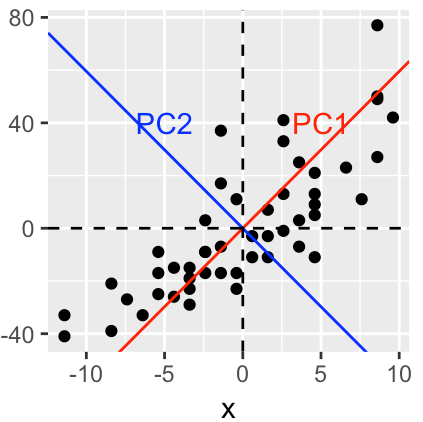

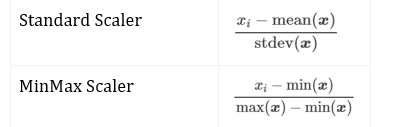

In [8]:
#Standardizing the features
X= StandardScaler().fit_transform(X)

In [9]:
print(X[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


**Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets**

In [20]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)

**fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.**

In [21]:
pca_data = pca.fit_transform(X)

print(pca_data.shape)
print(pca_data[:5])

(150, 2)
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


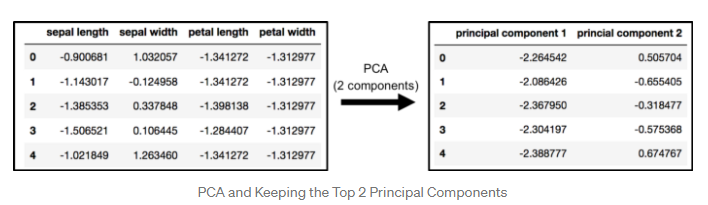

In [22]:
print(pca)

PCA(n_components=2)


**Facegrid-Multi-plot grid for plotting conditional relationships**
**Hue-Variables that define subsets of the data**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


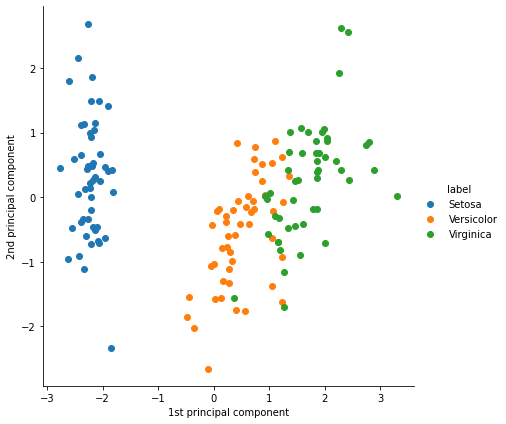

In [23]:
# attaching the label for each 2d point
pca_data = np.column_stack((pca_data, y))
pca_df = pd.DataFrame(data=pca_data, columns=("1st principal component", "2nd principal component", "label"))

# plotting the 2d points
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st principal component', '2nd principal component').add_legend()
plt.show()

In [24]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

**Explained Variance The explained variance tells you how much information (variance) can be attributed to each of the principal components**
Explained variance refers to the variance explained by each of the principal components (eigenvectors). It can be represented as a function of ratio of related eigenvalue and sum of eigenvalues of all eigenvectors. Let’s say that there are N eigenvectors, then the explained variance for each eigenvector (principal component) can be expressed the ratio of eigenvalue of related eigenvalue λi and sum of all eigenvalues (λ1+λ2+…+λn)

[0.76150718 0.23849282]
[0.76150718 1.        ]


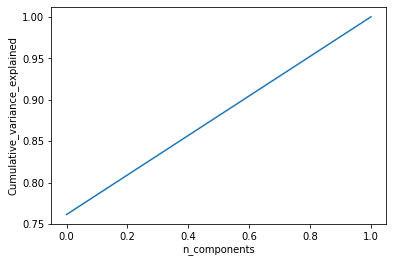

In [15]:
# PCA for dimensionality reduction
pca.n_components = 2
pca_data = pca.fit_transform(X)
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cumulative_var_explained = np.cumsum(percentage_var_explained)
print(percentage_var_explained)
print(cumulative_var_explained)

# Plot for variance explained
plt.plot(cumulative_var_explained)
plt.xlabel('n_components')
plt.ylabel('Cumulative_variance_explained')
plt.show()

In [37]:
for i in range(n):
  
  for j in range(n-i):
    print("*", end=" ")
  print()

* * * * * 
* * * * 
* * * 
* * 
* 
